In [ ]:
##### Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##### Import Data 

In [3]:
data=pd.read_csv("C:\\Users\\RAJESH KUMAR\\Documents\\Heart Attack.csv")

In [4]:
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [6]:
data.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [ ]:
#### Check for null values 

In [7]:
data.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [ ]:
##### Check for outliers 

In [8]:
## Numeric columns
numeric_columns=['age','gender','impluse','pressurehight','pressurelow','glucose','kcm','troponin']

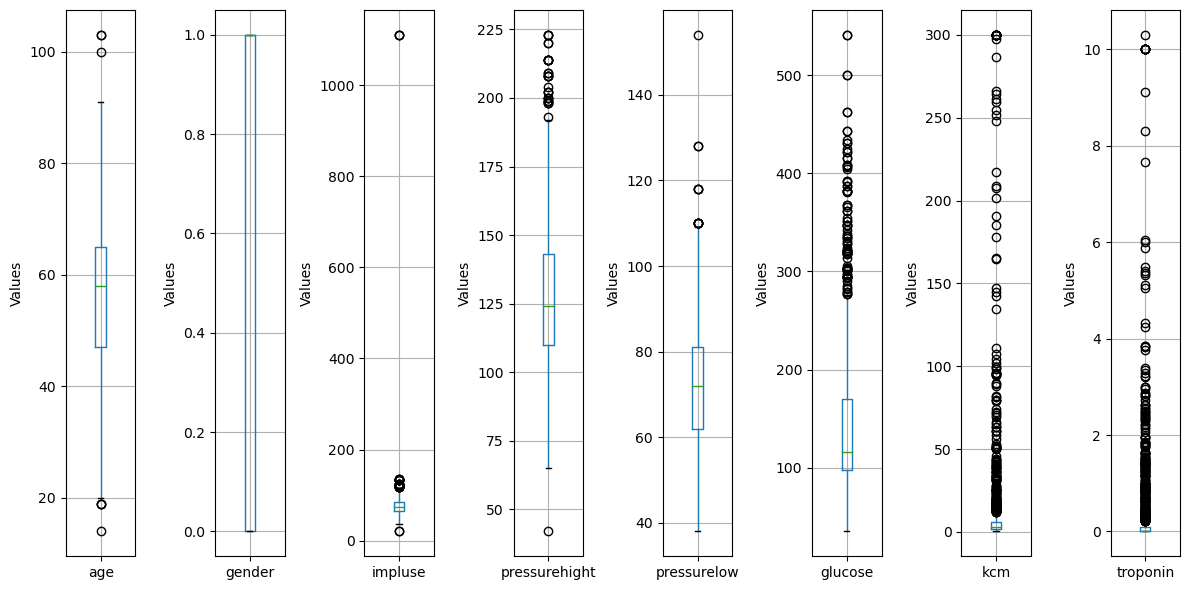

In [11]:
# Create subplots for selected columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(12, 6))

for i, column in enumerate(numeric_columns):
    data.boxplot(column=column, ax=axes[i])
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [12]:
selected_columns=['age','impluse','pressurehight','pressurelow','glucose','kcm','troponin']

In [ ]:
##### Treat outliers

In [13]:
# Define a function to treat outliers using percentiles
def treat_outliers_percentile(column, lower_percentile=0.25, upper_percentile=0.75):
    q1 = column.quantile(lower_percentile)
    q3 = column.quantile(upper_percentile)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column = np.where(column < lower_bound, q1, column)
    column = np.where(column > upper_bound, q3, column)
    return column

In [14]:
# Treat outliers in selected columns using percentiles
for column in selected_columns:
    data[column] = treat_outliers_percentile(data[column])

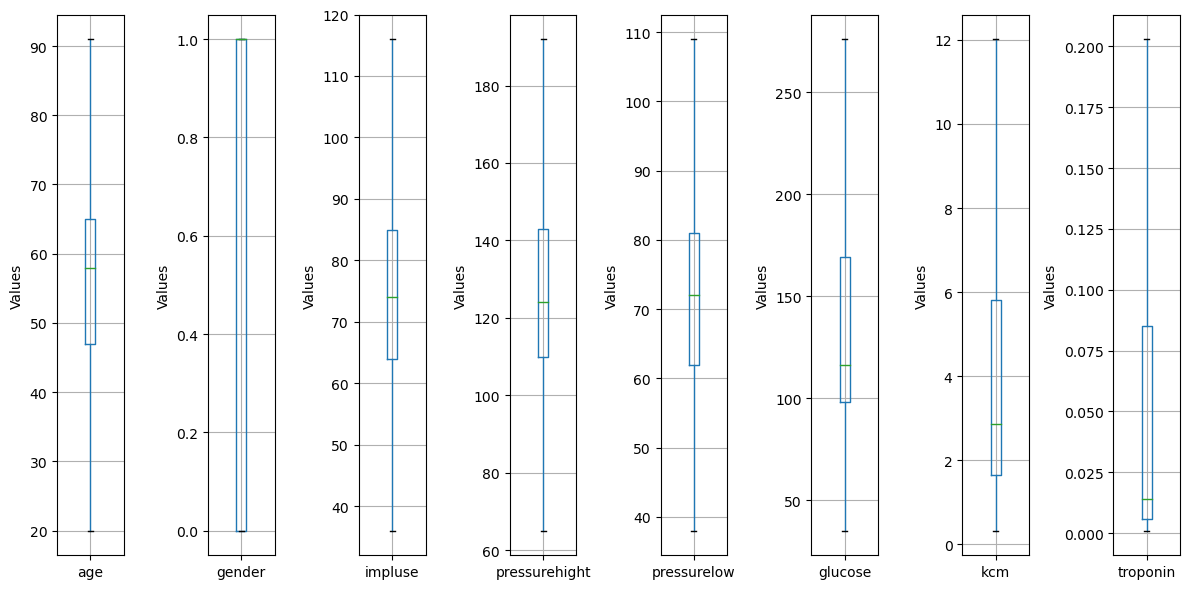

In [15]:
# Create subplots for selected columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(12, 6))

for i, column in enumerate(numeric_columns):
    data.boxplot(column=column, ax=axes[i])
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [ ]:
##### correlation heatmap

C:\Users\RAJESH KUMAR\AppData\Local\Temp\ipykernel_7596\3133334731.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")


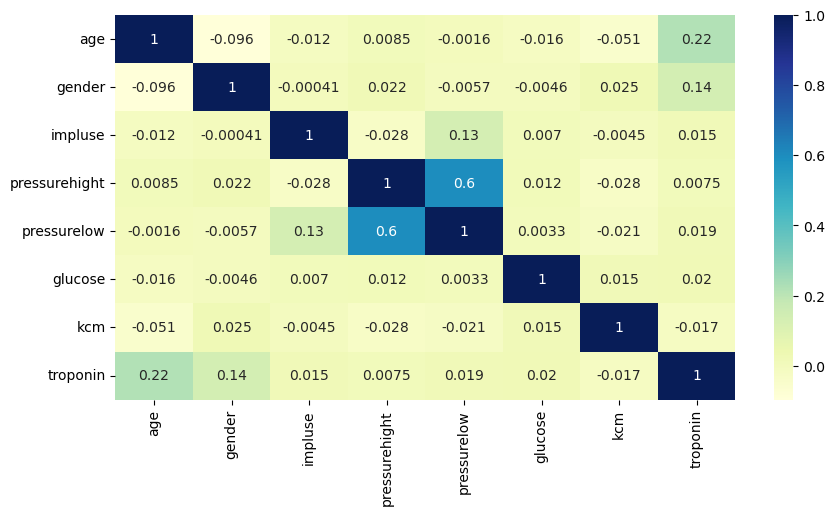

In [18]:
#Correlation using heatmap
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [19]:
# Train data and test data
X_data = data.drop('class', axis=1)
data['class'] = data['class'].map({'negative': 0, 'positive': 1})
y_data = data['class']


In [20]:
from sklearn.model_selection import train_test_split

In [21]:

# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.2, random_state=100,shuffle=True)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1055, 8), (264, 8), (1055,), (264,))

In [23]:
# Use RandomForestClassifier and GradientBoostingClassifier
# Use Grid Search to find the optimised hyperparameters
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Hyperparameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 150, 250],
    'classifier__max_depth': [3, 5, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}

In [25]:
# Pipelines for the classifiers
pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

In [26]:
# Grid search for Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [3, 5, 10],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 150, 250]},
             scoring='accuracy')

In [27]:
best_model_rf, best_score_rf = grid_search_rf.best_estimator_, grid_search_rf.best_score_
best_model_rf, best_score_rf

(Pipeline(steps=[('classifier',
                  RandomForestClassifier(max_depth=3, n_estimators=50,
                                         random_state=42))]),
 0.9810426540284359)

In [30]:
from sklearn.metrics import accuracy_score

# Test accuracy
# Make predictions on the test set using the Random Forest model
y_pred_rf = best_model_rf.predict(x_test)

# Calculate accuracy scores
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"RF accuracy: {accuracy_rf*100:.3f}")

RF accuracy: 97.727


In [31]:
# Get feature importances from the Random Forest model
importances_rf = best_model_rf.named_steps['classifier'].feature_importances_

# Convert to DataFrame for easier visualization
df_importances = pd.DataFrame({
    'Feature': data.drop('class', axis=1).columns,
    'Importance_RF': importances_rf,

})

df_importances.sort_values(by='Importance_RF', ascending=False)

,Feature,Importance_RF
7,troponin,0.553955
6,kcm,0.203695
0,age,0.148575
5,glucose,0.029753
3,pressurehight,0.021502
2,impluse,0.019748
4,pressurelow,0.015227
1,gender,0.007546
